## Логистическая регрессия

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import make_classification

In [24]:
X, y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [6]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


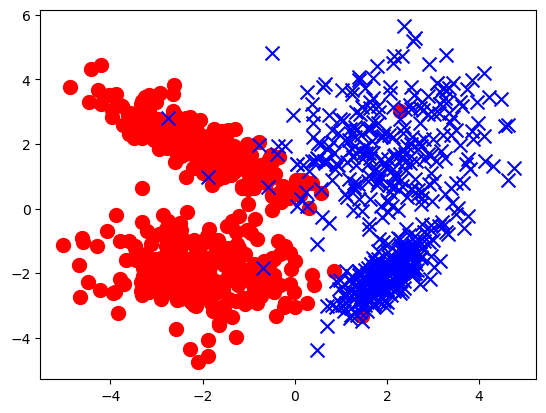

In [9]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker='o', c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker='x', c='b', s=100)

In [20]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [21]:
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [32]:
logreg = LogReg()

In [79]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [36]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [4]:
from sklearn.metrics import accuracy_score, f1_score

In [38]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [39]:
y_pr = logreg.predict_proba(X)

In [53]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [54]:
XX.shape

(1461960, 3)

In [66]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

In [68]:
logreg.predict_proba(XX).shape

(1461960,)

In [67]:
Z.shape

(1240, 1179)

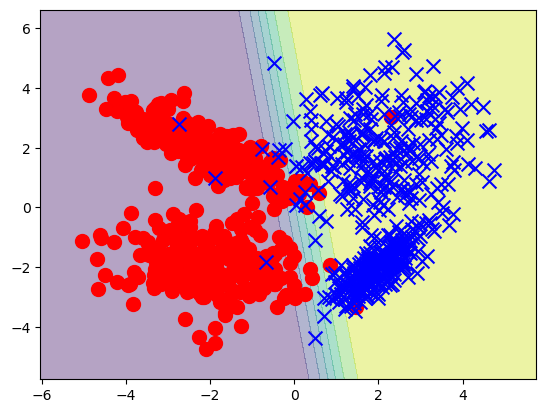

In [38]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

#### Задания для самостоятельного выполнения

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [5]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
model.fit(X, y)
y_pred_mod = model.predict(X) 

In [15]:
print(f'accuracy = {accuracy_score(y, y_pred_mod)}, F1-score = {f1_score(y, y_pred_mod)}')

accuracy = 0.976, F1-score = 0.9761431411530815


In [87]:
xx_1, yy_1 = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX_1 = np.array(list(zip(xx_1.ravel(), yy_1.ravel()))).reshape((-1, 2))
#XX_1 = np.array([(1, *xx_1) for xx_1 in XX_1])
xx_1

array([[-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       ...,
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961]])

In [102]:
Z_mod = model.predict_proba(XX_1)
Z_mod = Z_mod[:, 1].reshape(xx_1.shape) # Z = Z.reshape(xx.shape)
Z_mod.shape

(1240, 1179)

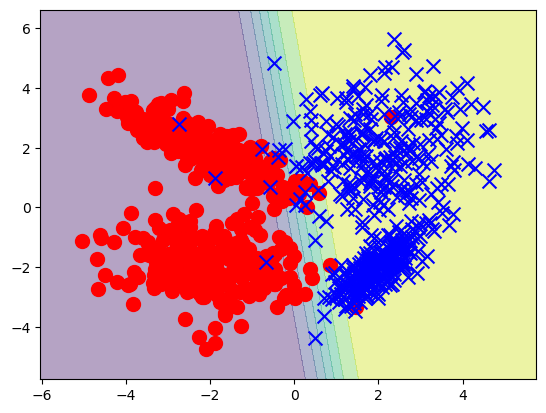

In [103]:
plt.contourf(xx_1, yy_1, Z_mod, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [25]:
alphas = np.linspace(0.00000000000001, 0.00001, 500)
for alpha in alphas:
    logreg_1 = LogReg(alpha)
    logreg_1.fit(X, y)
    y_predict = logreg_1.predict(X)
    print(f'alpha = {logreg_1._alpha}')
    print(f'accuracy = {accuracy_score(y, y_predict)}, F1-score = {f1_score(y, y_predict)}')

alpha = 1e-14
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 2.0040090140280563e-08
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 4.008017028056113e-08
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 6.012025042084168e-08
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 8.016033056112225e-08
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 1.0020041070140281e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 1.2024049084168338e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 1.4028057098196396e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 1.603206511222445e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 1.8036073126252506e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 2.0040081140280564e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 2.204408915430862e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 2.404809716833667e-07
accuracy = 0.75, F1-score = 0.7422680412371134
alpha = 2

3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [53]:
class LogReg(SGD):
    @staticmetod
    def fict_axis(self, X):
        return np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    
    

In [54]:
logreg_X = LogReg()
logreg_X.fict_axis(X)

array([[ 1.        ,  1.        ,  1.86341137,  0.08764555],
       [ 1.        ,  1.        , -1.53099717,  1.90118241],
       [ 1.        ,  1.        , -0.01722404, -2.59111159],
       ...,
       [ 1.        ,  1.        ,  2.33019532,  4.72180951],
       [ 1.        ,  1.        , -2.01084076,  1.42633933],
       [ 1.        ,  1.        , -2.00873243,  2.24540194]])

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

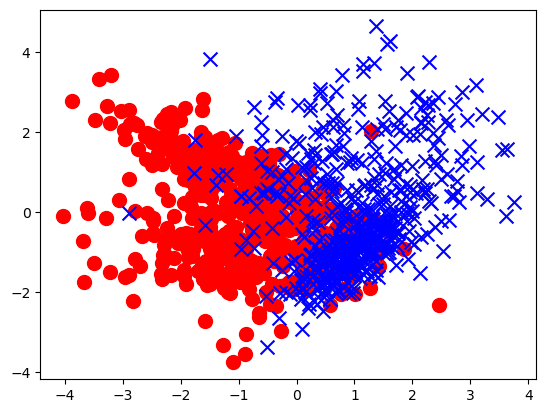

Значение параметра class_sep = 1


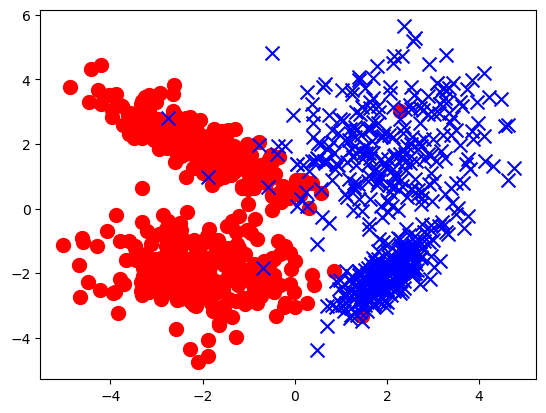

Значение параметра class_sep = 2


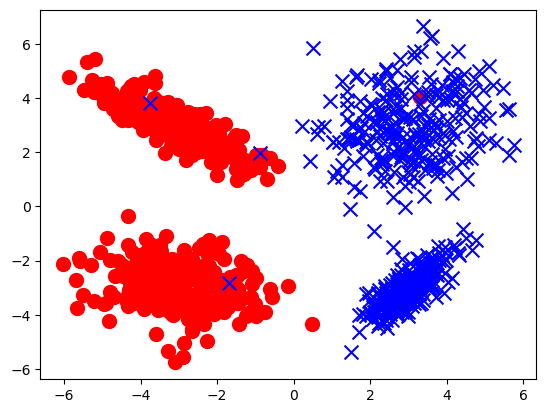

Значение параметра class_sep = 3


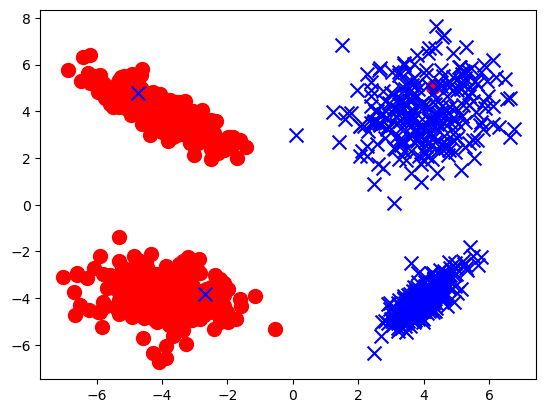

Значение параметра class_sep = 4


In [58]:
for i in range(1,5):
    X_4,y_4 = make_classification (n_samples=1000,
                              n_features=2,
                              n_informative=2,
                              n_redundant=0,
                              n_classes=2,
                              class_sep=i,
                              random_state=1)
    plt.scatter(X_4[:, 0][y==0], X_4[:, 1][y==0], marker='o', c='r', s=100)
    plt.scatter(X_4[:, 0][y==1], X_4[:, 1][y==1], marker='x', c='b', s=100)
    plt.show()
    print(f'Значение параметра class_sep = {i}')

Чем больше значение параметра class_sep, тем проще определить границу принятия решения.

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [112]:
X_5, y_5 = make_classification (n_samples=1000,
                              n_features=5,
                              n_informative=2,
                              n_redundant=0,
                              n_classes=2,
                              class_sep=2,
                              random_state=1)

In [113]:
X_5

array([[-1.21080113, -1.27187358, -0.25431072, -1.35363543,  1.20205935],
       [ 1.06376211, -0.2168127 , -0.83114819, -1.84028713,  0.33329307],
       [ 2.63253135, -1.37665157, -0.76218483, -3.28883786,  1.07072559],
       ...,
       [ 2.47436041,  0.1445099 , -1.37042989, -1.7607248 ,  0.15550037],
       [-1.54948664, -0.16866229,  0.0075604 , -2.83910137,  0.29473951],
       [-2.27403318,  0.00726048, -0.45492784,  1.85541965,  1.9865392 ]])

In [64]:
logreg_5 = LogReg()
logreg_5.fict_axis(X_5)
logreg_5.fit(X_5, y_5)
y_5_pred = logreg_5.predict(X_5)

In [65]:
ac_5 = accuracy_score(y_5, y_5_pred)
f1_5 = f1_score(y_5, y_5_pred)
print(f'accuracy = {ac_5} F1-score = {f1_5}')

accuracy = 0.977 F1-score = 0.9771598808341608


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [15]:
X_6, y_6 = make_classification (n_samples=1000,
                              n_features=12, 
                              n_informative=10,
                              n_redundant=0,
                              n_classes=4,
                              class_sep=2,
                              random_state=1)

model_6 = LogisticRegression(multi_class='ovr')
model_6.fit(X_6, y_6)
y_6_pred = model_6.predict(X_6)
ac_6 = accuracy_score(y_6, y_6_pred)
print(f'accuracy = {ac_6}')

accuracy = 0.83


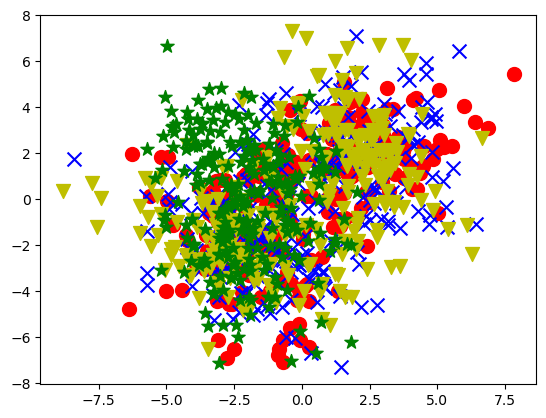

In [18]:
plt.scatter(X_6[:, 1][y_6==0], X_6[:, 3][y_6==0], marker="o", c='r', s=100)
plt.scatter(X_6[:, 1][y_6==1], X_6[:, 3][y_6==1], marker="x", c='b', s=100)
plt.scatter(X_6[:, 1][y_6==2], X_6[:, 3][y_6==2], marker="v", c='y', s=100)
plt.scatter(X_6[:, 1][y_6==3], X_6[:, 3][y_6==3], marker="*", c='g', s=100)

7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [8]:
model = LogisticRegression()
model.fit(X_6, y_6)
pred_mod = model.predict_proba(X) 
pred_mod

array([[3.76133682e-03, 9.96238663e-01],
       [9.86150998e-01, 1.38490024e-02],
       [7.93290004e-01, 2.06709996e-01],
       ...,
       [1.38917120e-04, 9.99861083e-01],
       [9.97398416e-01, 2.60158434e-03],
       [9.96372839e-01, 3.62716089e-03]])